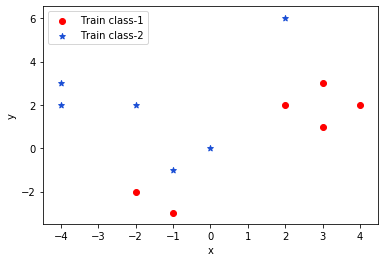

In [1]:
#loading training data
#Plotting training data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Plotting training data
x,y,z = np.loadtxt('train.txt',unpack=True, delimiter=' ')
plt.xlabel('x')
plt.ylabel('y')
for m in range(len(z)):
    #print(m + 1, days[m])
    if z[m]==1:
        xc1=plt.scatter(x[m], y[m], color='r')
    elif z[m]==2:
        xc2=plt.scatter(x[m], y[m], marker='*', color='#184DD5')
        
plt.legend([xc1, xc2], ["Train class-1", "Train class-2"])
plt.show()

In [2]:
#x component of mean1
m1x=[]
for m in range(len(z)):
    if z[m]==1:
        m1x.extend([x[m]])

print(m1x)
ux1=np.mean(m1x)
print(ux1)
#y component of mean1
m1y=[]
for m in range(len(z)):
    if z[m]==1:
        m1y.extend([y[m]])
        
print(m1y)
uy1=np.mean(m1y)
print(uy1)
#x component of mean2
m2x=[]
for m in range(len(z)):
    if z[m]==2:
        m2x.extend([x[m]])
        
print(m2x)
ux2=np.mean(m2x)
print(ux2)
#y component of mean2
m2y=[]
for m in range(len(z)):
    if z[m]==2:
        m2y.extend([y[m]])
        
print(m2y)
uy2=np.mean(m2y)
print(uy2)

#making list of x y components of mean of two classes
mean1=[ux1,uy1]
print(mean1)
mean2=[ux2,uy2]
print(mean2)

[2.0, 3.0, 3.0, -1.0, 4.0, -2.0]
1.5
[2.0, 1.0, 3.0, -3.0, 2.0, -2.0]
0.5
[-4.0, 2.0, 0.0, -2.0, -1.0, -4.0]
-1.5
[3.0, 6.0, 0.0, 2.0, -1.0, 2.0]
2.0
[1.5, 0.5]
[-1.5, 2.0]


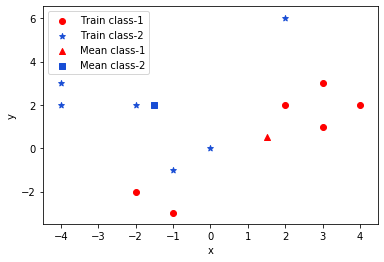

In [3]:
#plotting mean of two classes along with training data
plt.xlabel('x')
plt.ylabel('y')
for m in range(len(z)):
    if z[m]==1:
        xc1=plt.scatter(x[m], y[m], color='r')
    elif z[m]==2:
        xc2=plt.scatter(x[m], y[m], marker='*', color='#184DD5')

xm1=plt.scatter(ux1, uy1, marker='^', color='r')
xm2=plt.scatter(ux2,uy2, marker='s', color='#184DD5')
plt.legend([xc1, xc2, xm1, xm2], ["Train class-1", "Train class-2", "Mean class-1", "Mean class-2"])
plt.show()

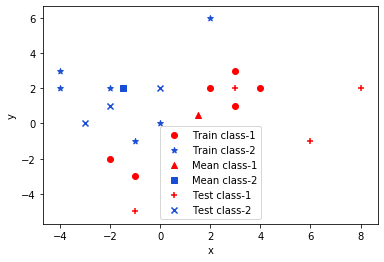

In [4]:
#classifying testing data using minimum distance to class mean classifier
w = np.loadtxt('test.txt',unpack=False, delimiter=' ')
plt.xlabel('x')
plt.ylabel('y')
for m in range(len(z)):
    if z[m]==1:
        xc1=plt.scatter(x[m], y[m], color='r')
    elif z[m]==2:
        xc2=plt.scatter(x[m], y[m], marker='*', color='#184DD5')

xm1=plt.scatter(ux1, uy1, marker='^', color='r')
xm2=plt.scatter(ux2,uy2, marker='s', color='#184DD5')
for i in range(len(w)):
    g1=pd.Series(w[i, 0:2]).dot(pd.Series(mean1))-0.5*pd.Series(mean1).dot(pd.Series(mean1))
    g2=pd.Series(w[i, 0:2]).dot(pd.Series(mean2))-0.5*pd.Series(mean2).dot(pd.Series(mean2))
    if g1>g2:
        xt1=plt.scatter(w[i,0], w[i,1], marker='+', color='r')
    elif g1<g2:
        xt2=plt.scatter(w[i,0],w[i,1], marker='x', color='#184DD5')
plt.legend([xc1, xc2, xm1, xm2,xt1,xt2], ["Train class-1", "Train class-2", "Mean class-1", "Mean class-2",
                                          "Test class-1", "Test class-2"])
plt.show()

In [8]:
#y intercept 
minx=min(x)
print(minx)
maxx=max(x)
print(maxx)

for j in range(int(minx),int(maxx),1):
    print(j)

s1=pd.Series(mean1).dot(pd.Series(mean1))
s2=pd.Series(mean2).dot(pd.Series(mean2))

intercept=0.5*(s1-s2)
print(intercept)
#x-coefficient and y coefficient
coeff=np.array(mean1)-np.array(mean2)
print(coeff)
print(coeff[1])
#list of range of x from -4 to 4
import decimal
def float_range(start, stop, step):
  while start < stop:
    yield float(start)
    start += decimal.Decimal(step)

rangex=list(float_range(int(minx), int(maxx), '0.3'))
print(rangex)

-4.0
4.0
-4
-3
-2
-1
0
1
2
3
-1.875
[ 3.  -1.5]
-1.5
[-4.0, -3.7, -3.4, -3.1, -2.8, -2.5, -2.2, -1.9, -1.6, -1.3, -1.0, -0.7, -0.4, -0.1, 0.2, 0.5, 0.8, 1.1, 1.4, 1.7, 2.0, 2.3, 2.6, 2.9, 3.2, 3.5, 3.8]


[1, 1, 2, 1, 1, 2, 2]


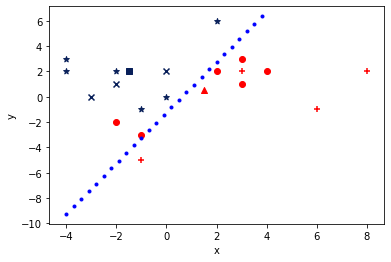

In [11]:
#classifying testing data using minimum distance to class mean classifier
w = np.loadtxt('test.txt',unpack=False, delimiter=' ')
plt.xlabel('x')
plt.ylabel('y')
pred=[]
for m in range(len(z)):
    #print(m + 1, days[m])
    if z[m]==1:
        plt.scatter(x[m], y[m], color='r')
    elif z[m]==2:
        plt.scatter(x[m], y[m], marker='*', color='#081F59')

plt.scatter(ux1, uy1, marker='^', color='r')
plt.scatter(ux2,uy2, marker='s', color='#081F59')
for i in range(len(w)):
    g1=pd.Series(w[i, 0:2]).dot(pd.Series(mean1))-0.5*pd.Series(mean1).dot(pd.Series(mean1))
    g2=pd.Series(w[i, 0:2]).dot(pd.Series(mean2))-0.5*pd.Series(mean2).dot(pd.Series(mean2))
    if g1>g2:
        plt.scatter(w[i,0], w[i,1], marker='+', color='r')
        pred.extend([1])
    elif g1<g2:
        plt.scatter(w[i,0],w[i,1], marker='x', color='#081F59')
        pred.extend([2])
        
for j in range(len(rangex)):
    yval=-(coeff[0]*(rangex[j])+intercept)/coeff[1]
    plt.plot(rangex[j],yval, '.b')
    #plt.show()
   # print(rangex[j])

print(pred)

In [12]:
#Testing Accuracy
cnt=0
for k in range(len(w)):
    if pred[k]==w[k][2]:
        #print('pred', )
        cnt=cnt+1
        
print(cnt)
print(len(w))

test_acc=cnt/len(w)*100
print("Test accuracy: ", test_acc, "%") 

#Training Accuracy
train_acc=10/12*100
print("Train accuracy: ", train_acc, "%")

6
7
Test accuracy:  85.71428571428571 %
Train accuracy:  83.33333333333334 %


In [1]:
from sympy import symbols
from sympy.plotting import plot
x = symbols('x')
p1 = plot(x*x, show=False)
p2 = plot(x, show=False)
p1.append(p2[0])
p1